# jammer
## 06- `star_marley.py`  on Gl570D
### I. Run01-- failed run


In [1]:
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [2]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

In [3]:
ws = np.load("../sf/Gl570D/output/marley_grid/run01/temp_emcee_chain.npy")

In [4]:
burned = ws[:, :1249,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

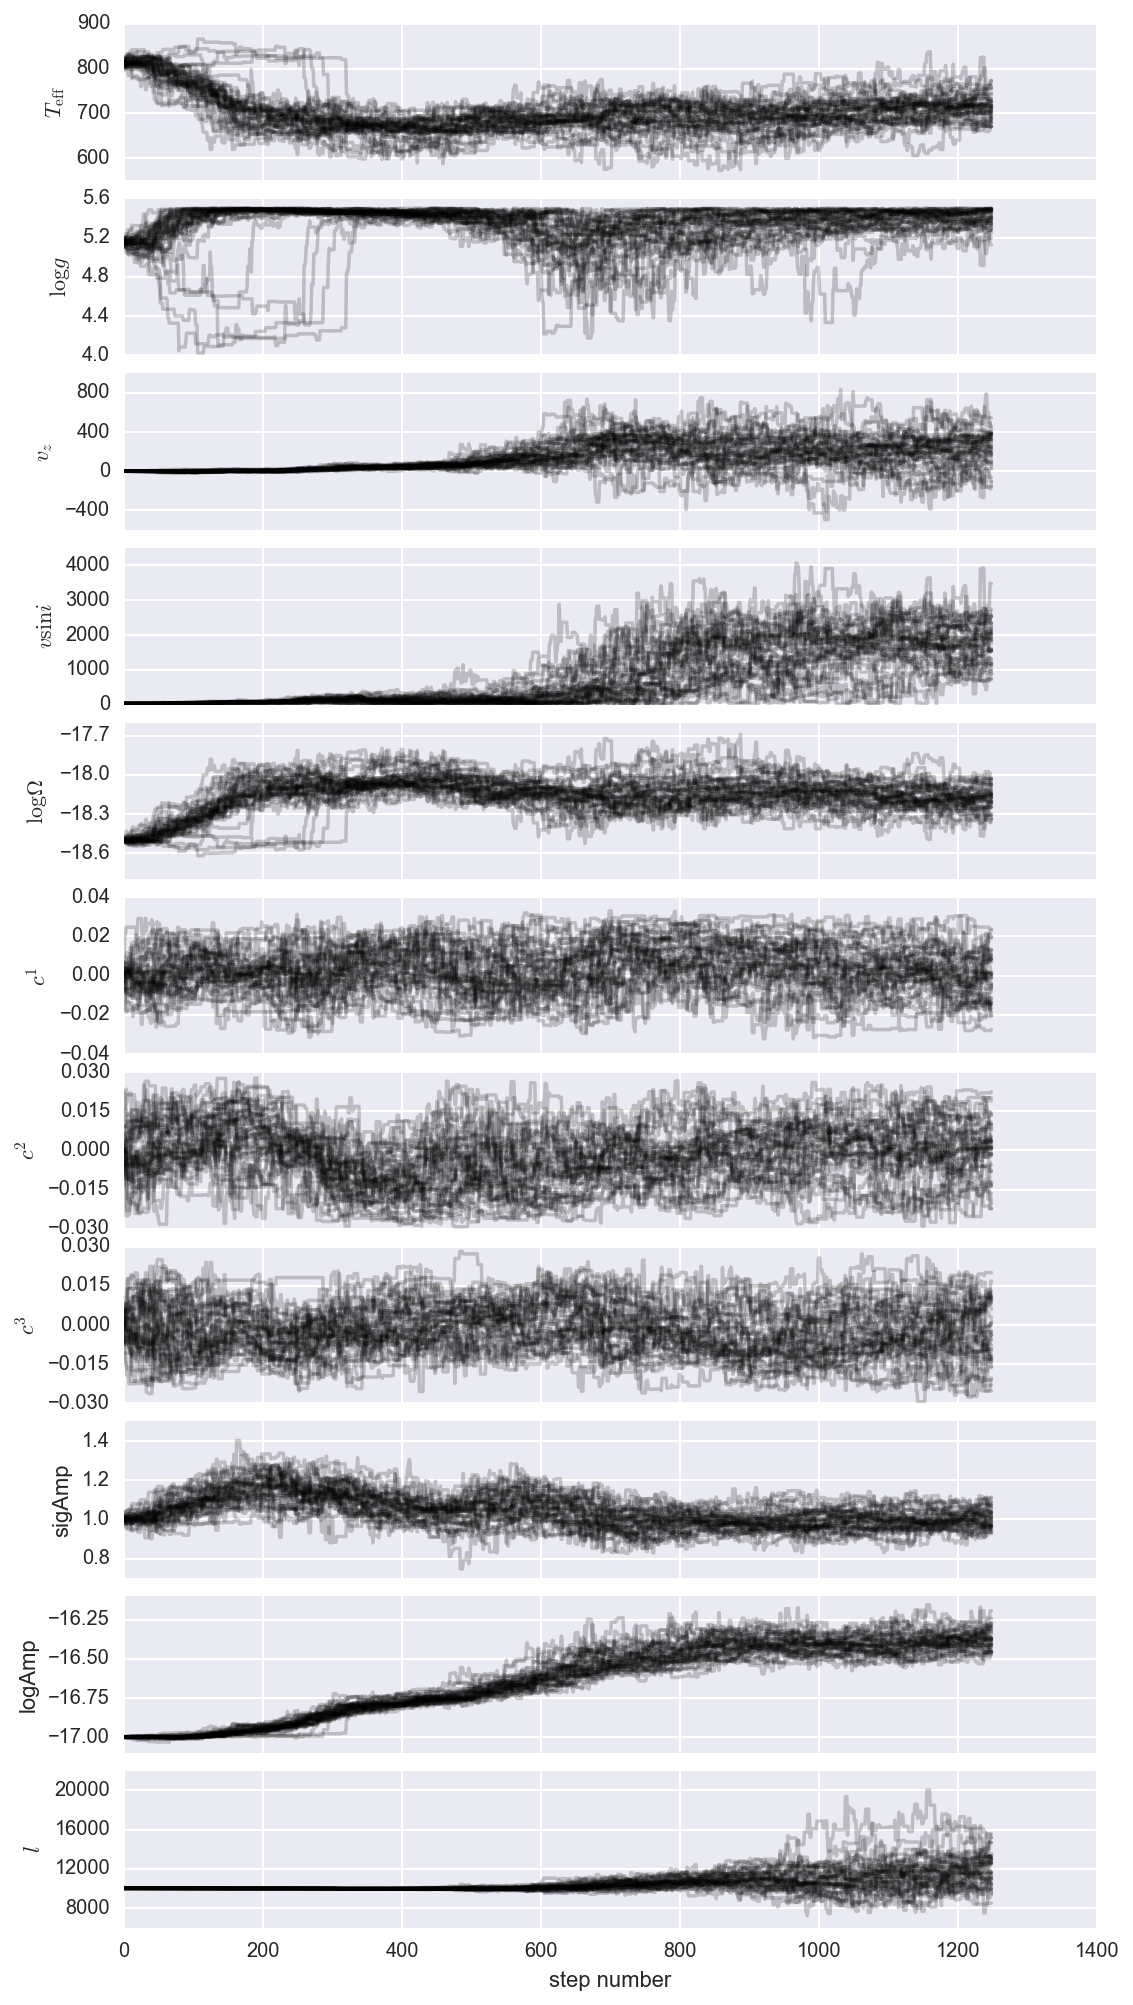

In [5]:
fig, axes = plt.subplots(11, 1, sharex=True, figsize=(8, 14))
for i in range(0, 11, 1):
    axes[i].plot(burned[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[10].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

```text
------------------------CC_debugger-------------------------
See https://github.com/iancze/Starfish/issues/26
Covariance matrix at a glance:
- There are 2 negative eigenvalues out of 139.
Covariance matrix eigenvalues:
     0 >>>>>>>>>>-1.201e-36
     1 >>>>>>>>>>-7.503e-37
     2 ...........3.159e-36
     3 ...........4.467e-36
     4 ...........5.113e-36
     5 ...........6.623e-36
     6 ...........6.841e-36
     7 ...........6.904e-36
     8 ...........8.859e-36
     9 ...........9.206e-36
            ...
   129 ...........2.895e-32
   130 ...........3.879e-32
   131 ...........5.255e-32
   132 ...........7.150e-32
   133 ...........9.695e-32
   134 ...........1.298e-31
   135 ...........1.690e-31
   136 ...........2.141e-31
   137 ...........2.868e-31
   138 ...........4.345e-31
------------------------------------------------------------
emcee: Exception while calling your likelihood function:
  params: [  7.11473067e+02   5.37787319e+00   1.96120960e+01   1.89785603e+03
  -1.81755169e+01   4.60513439e-03   1.45799290e-02  -1.14726105e-03
   1.05991813e+00  -1.59654925e+01   2.60245933e+04]
  args: []
  kwargs: {}
  exception:
```

Something is wrong!  Let's look at the CC Matrix

In [6]:
CC = np.load('../sf/Gl570D/output/marley_grid/run01/CC_matrix.npy')
X = np.load('../sf/Gl570D/output/marley_grid/run01/X.npy')
part1 = np.load('../sf/Gl570D/output/marley_grid/run01/part1.npy')
part2 = np.load('../sf/Gl570D/output/marley_grid/run01/part2.npy')
cheb = np.load('../sf/Gl570D/output/marley_grid/run01/cheb.npy')
flux_mean = np.load('../sf/Gl570D/output/marley_grid/run01/flux_mean.npy')
flux_std = np.load('../sf/Gl570D/output/marley_grid/run01/flux_std.npy')
C_GP = np.load('../sf/Gl570D/output/marley_grid/run01/C_GP.npy')

In [7]:
#! ls ../sf/Gl570D/output/marley_grid/run01/*.npy

# $\ln p$ Evaluation 

```python
        X = (self.chebyshevSpectrum.k * self.flux_std * np.eye(self.ndata)).dot(self.eigenspectra.T)

        part1 = self.Omega**2 * self.flux_scalar**2 * X.dot(self.C_GP.dot(X.T))
        part2 = self.data_mat
        
        #CC = X.dot(self.C_GP.dot(X.T)) + self.data_mat
        CC = part1 + part2

        CC = X.dot(self.C_GP.dot(X.T)) + self.data_mat

        try:
            factor, flag = cho_factor(CC)
        except np.linalg.linalg.LinAlgError:
            print("Spectrum:", self.spectrum_id, "Order:", self.order)
            self.CC_debugger(CC)
            raise

        try:

            model1 = self.Omega * self.flux_scalar *(self.chebyshevSpectrum.k * self.flux_mean + X.dot(self.mus))
            R = self.fl - model1

            logdet = np.sum(2 * np.log((np.diag(factor))))
            self.lnprob = -0.5 * (np.dot(R, cho_solve((factor, flag), R)) + logdet)
```

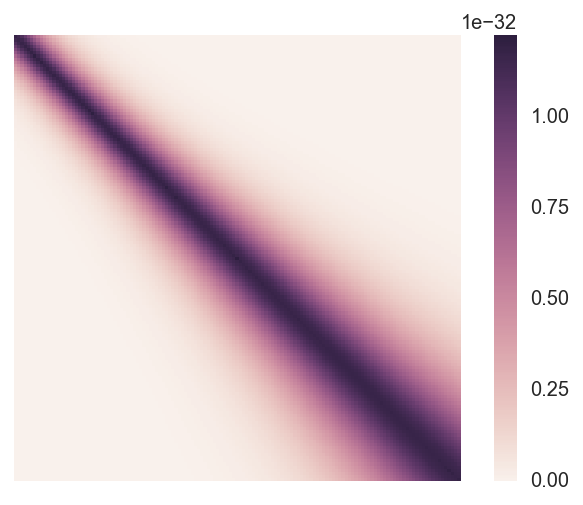

In [8]:
#plt.figure(figsize=(10, 12))
sns.heatmap(CC, square=True, xticklabels=False, yticklabels=False)

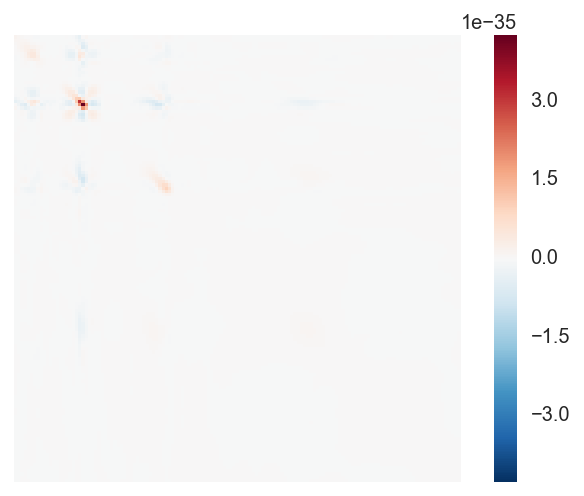

In [9]:
sns.heatmap(part1, square=True, xticklabels=False, yticklabels=False)

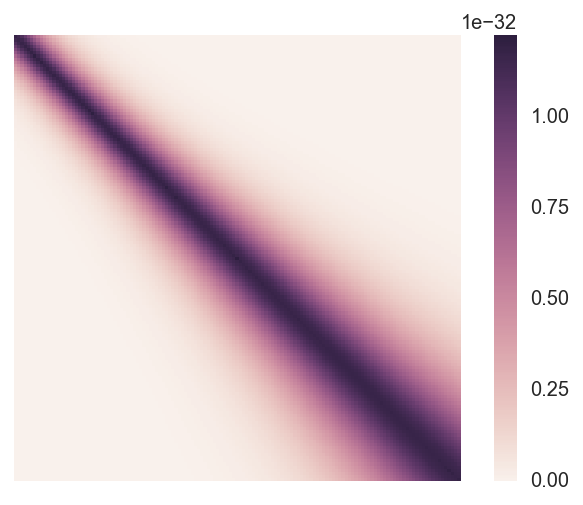

In [10]:
sns.heatmap(part2, square=True, xticklabels=False, yticklabels=False)

In [11]:
import scipy

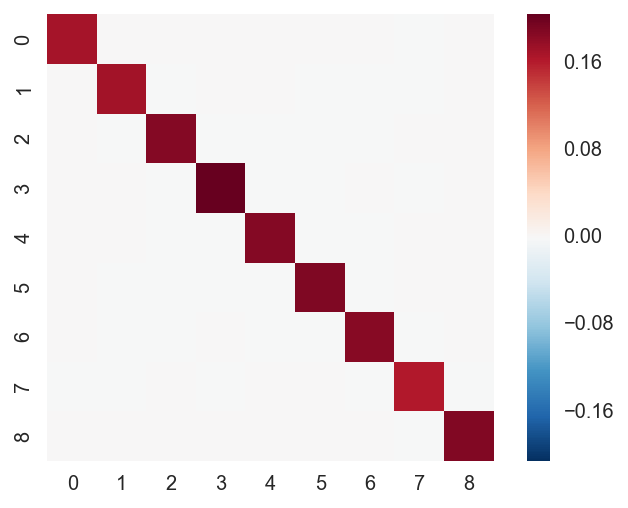

In [12]:
sns.heatmap(C_GP, square=True)

In [13]:
part1.shape, X.shape

((139, 139), (139, 9))

## Is the problem in the cheb spectrum?

In [14]:
x_vec = np.arange(-1, 1, 0.01)

In [15]:
from numpy.polynomial import Chebyshev as Ch

In [16]:
ch_tot = Ch([0,0.03, 0.03, -0.03])
ch_spec = ch_tot(x_vec)

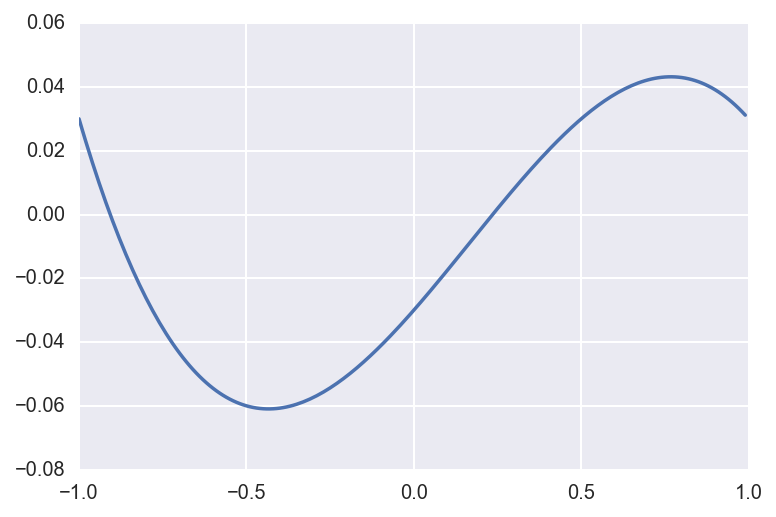

In [17]:
plt.plot(x_vec, ch_spec)

Nah.

## What do the spectral look like?

Hack for right now-- hand-edit the code to pick your desired sample.

```bash
$ $jammer/code/plot_specific_mix_model_marley.py --config
$ $jammer/code/plot_specific_mix_model_marley.py
```

In [18]:
dat1 = pd.read_csv('../sf/Gl570D/output/marley_grid/run01/spec_config.csv')
dat2 = pd.read_csv('../sf/Gl570D/output/marley_grid/run01/models_draw.csv')

In [19]:
sns.set_style('ticks')

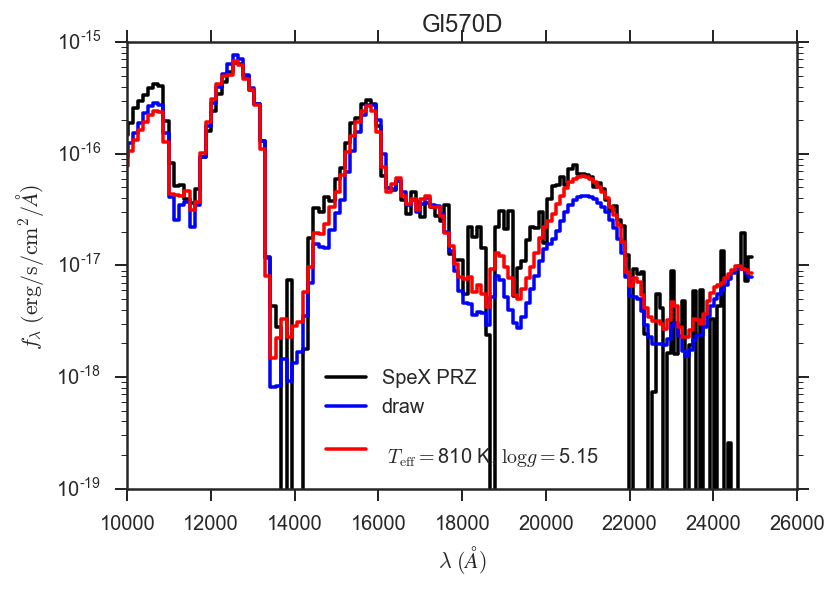

In [20]:
plt.step(dat1.wl, dat1.data, 'k', label='SpeX PRZ')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='draw')
plt.step(dat1.wl, dat1.model_composite, 'r',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D')
plt.legend(loc='best')
plt.yscale('log')
plt.savefig('../results/Gl570D_better_fit.png', dpi=300, bbox_inches='tight')

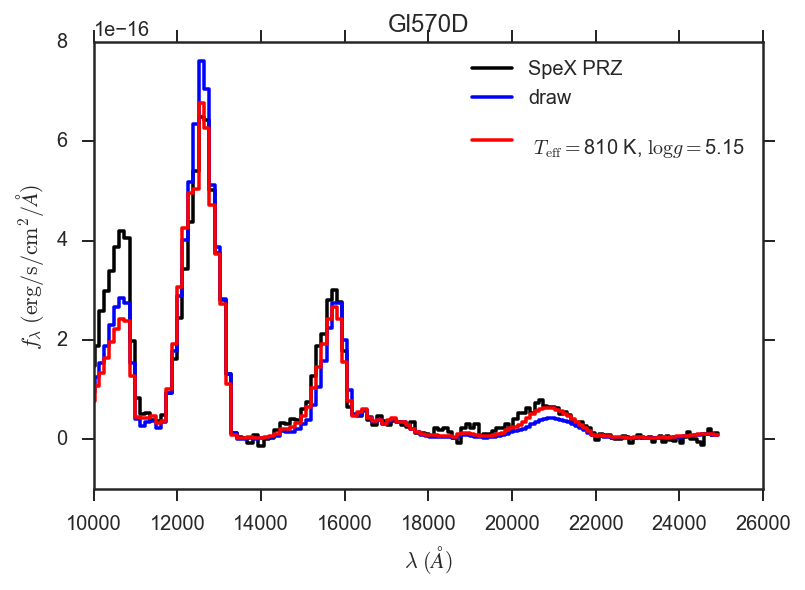

In [21]:
plt.step(dat1.wl, dat1.data, 'k', label='SpeX PRZ')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='draw')
plt.step(dat1.wl, dat1.model_composite, 'r',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D')
plt.legend(loc='best')
plt.yscale('linear')

I'm pretty sure the problem is in the covariance matrix being too strong / too large off-diagonal terms.  I'll stick in a prior.